In [123]:
import pandas as pd
import seaborn as sns
import os

os.chdir('/media/alexander-phy/Partition/db-public_sector_internships')

In [124]:
offers = pd.read_csv('notebooks/offers_data.csv')

offers.drop(columns=['current_date_a', 'current_date_b', 'current_date_f', 'current_date'], inplace=True)
offers.drop(columns=['id_c', 'id_d', 'id_g', 'id_h'], inplace=True)
offers.rename({'current_date_e': 'current_date', 'name': 'organization', 'name_e': 'career', 'name_f': 'city'}, inplace=True, axis=1)

In [125]:
offers.columns.sort_values()

Index(['Unnamed: 0', 'active', 'career', 'career_id', 'city', 'city_id',
       'current_date', 'end_date', 'knowledge', 'offer_id', 'offer_page_code',
       'offer_title', 'organization', 'organization_id', 'responsabilities',
       'salary', 'specific_location', 'specific_requirements', 'to_apply',
       'type', 'url', 'vacants'],
      dtype='object')

In [ ]:
# Drop irrelevant information for the analysis
offers_cleaned = offers.drop(columns=['offer_page_code', 'city_id', 'organization_id', 'career_id', 'Unnamed: 0'], errors='ignore')

# Change datatype object to datetime for current_date 
offers_cleaned.current_date = pd.to_datetime(offers_cleaned.current_date)

# Get month name from current_date and put as another column
offers_cleaned['month'] = offers_cleaned.current_date.apply(lambda row: row.month_name())


In [127]:
offers_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3384 entries, 0 to 3383
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   offer_title            3264 non-null   object 
 1   vacants                3311 non-null   float64
 2   type                   3361 non-null   object 
 3   to_apply               3384 non-null   object 
 4   specific_requirements  931 non-null    object 
 5   knowledge              1753 non-null   object 
 6   salary                 3193 non-null   float64
 7   responsabilities       1404 non-null   object 
 8   specific_location      3365 non-null   object 
 9   end_date               3345 non-null   object 
 10  url                    3384 non-null   object 
 11  current_date           3384 non-null   object 
 12  active                 3384 non-null   int64  
 13  offer_id               3384 non-null   int64  
 14  career                 3378 non-null   object 
 15  city

In [137]:
def funct(series: pd.Series):
    return series.apply(lambda row: [row])

In [ ]:
offers_cleaned.groupby('offer_id')['career'].

offer_id
1                          DERECHO
2                       PSICOLOGÍA
3                   ADMINISTRACIÓN
4                   ADMINISTRACIÓN
5                   ADMINISTRACIÓN
                   ...            
1599    ADMINISTRACIÓN DE EMPRESAS
1600        SECRETARIADO EJECUTIVO
1601                  CONTABILIDAD
1603    ADMINISTRACIÓN DE EMPRESAS
1605        SECRETARIADO EJECUTIVO
Name: career, Length: 1585, dtype: object

In [ ]:
test = pd.Series(['hola', 'mi', 'arnes'])

test.str.


In [115]:
a = offers_cleaned.groupby('month')['month'].count()
a

month
April    1111
June      340
March     510
May      1423
Name: month, dtype: int64

<Axes: xlabel='month', ylabel='month'>

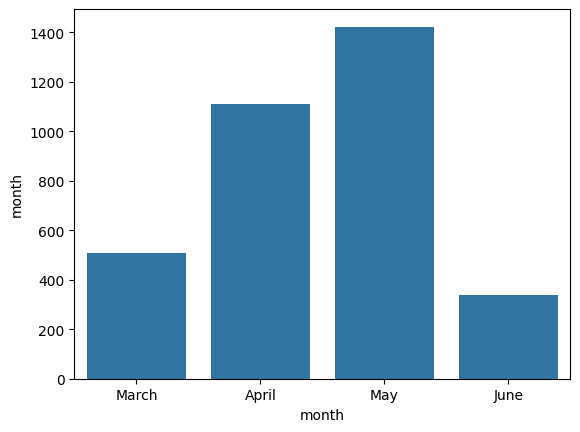

In [117]:
sns.barplot(data=a, order=['March', 'April', 'May', 'June'])